In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

In [87]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [88]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [89]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df['precent']=missing_df['missing_count']/train.shape[0]*100
missing_df

,column_name,missing_count,precent
1,Item_Weight,1463,17.165317
8,Outlet_Size,2410,28.276428


In [90]:
missing_df = test.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df['precent']=missing_df['missing_count']/test.shape[0]*100
missing_df

,column_name,missing_count,precent
1,Item_Weight,976,17.180074
8,Outlet_Size,1606,28.269671


In [91]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [92]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [93]:
train.shape

(8523, 12)

In [94]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [95]:
#Examining Item_Identifier

In [96]:
train['Item_Identifier'].isnull().sum()

0

In [97]:
train['Item_Identifier'].nunique()

1559

In [98]:
train["Item_Id"] = train["Item_Identifier"].apply(lambda x:x[:2])

In [99]:
test["Item_Id"] = test["Item_Identifier"].apply(lambda x:x[:2])

In [100]:
train.drop(['Item_Identifier'],axis=1,inplace=True)

In [101]:
test.drop(['Item_Identifier'],axis=1,inplace=True)

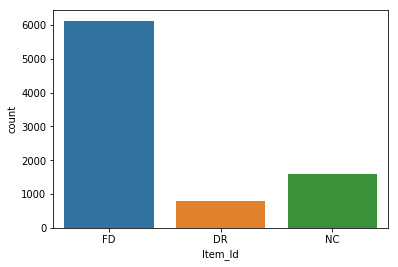

In [102]:
sns.countplot(train['Item_Id'])

In [103]:
#Examining Item Weight 

In [104]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [105]:
train['Item_Weight'].isnull().sum()

0

In [106]:
train['Item_Weight'].isnull().sum()

0

/home/royal/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


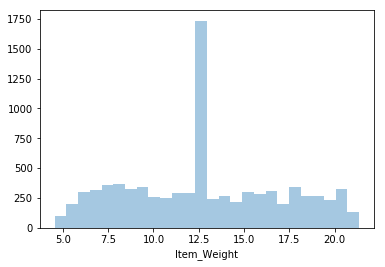

In [107]:
sns.distplot(train['Item_Weight'].dropna(),kde=False)

In [108]:
train['actual_weight']=train['Item_Weight']
test['actual_weight']=test['Item_Weight']

In [109]:
train['weightband'] = pd.qcut(train['Item_Weight'], 3)
train[['weightband', 'Item_Outlet_Sales']].groupby(['weightband'], as_index=False).mean().sort_values(by='weightband', ascending=True)

,weightband,Item_Outlet_Sales
0,"(4.553999999999999, 11.1]",2089.212723
1,"(11.1, 14.35]",2321.156582
2,"(14.35, 21.35]",2134.082047


In [110]:
combine=[train,test]
for dataset in combine:
    dataset.loc[ dataset['Item_Weight'] <= 11.1, 'Item_Weight'] = 0
    dataset.loc[(dataset['Item_Weight'] > 11.1) & (dataset['Item_Weight'] <= 14.35), 'Item_Weight'] = 1
    dataset.loc[ dataset['Item_Weight'] > 14.35, 'Item_Weight'] = 2
    dataset['Item_Weight'] = dataset['Item_Weight'].astype(int)

train= train.drop(['weightband'], axis=1)
    
train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight
0,0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,9.300000
1,0,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,5.920000
2,2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,17.500000
3,2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,19.200000
4,0,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,8.930000
5,0,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,10.395000
6,1,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD,13.650000
7,1,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD,12.857645
8,2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,FD,16.200000
9,2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,FD,19.200000


/home/royal/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


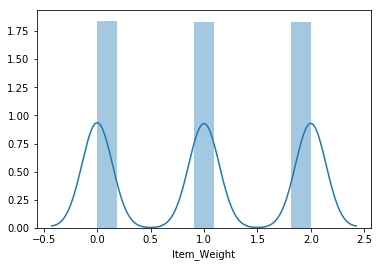

In [111]:
sns.distplot(train['Item_Weight'].dropna())

In [112]:
#Examiing Fat content

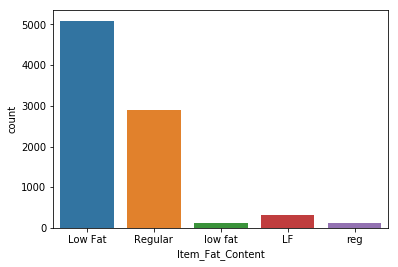

In [113]:
sns.countplot(train['Item_Fat_Content'])

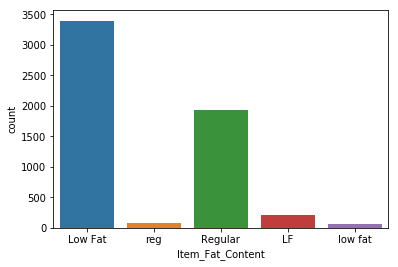

In [114]:
sns.countplot(test['Item_Fat_Content'])

In [115]:
train['Item_Fat_Content']=train['Item_Fat_Content'].apply(lambda x:0 if (x=='Regular' or x=='reg') else 1)

In [116]:
test['Item_Fat_Content']=test['Item_Fat_Content'].apply(lambda x:0 if (x=='Regular' or x=='reg') else 1)

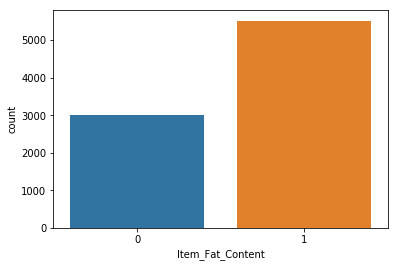

In [117]:
sns.countplot(train['Item_Fat_Content'])

In [118]:
#Examining item visibility

/home/royal/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


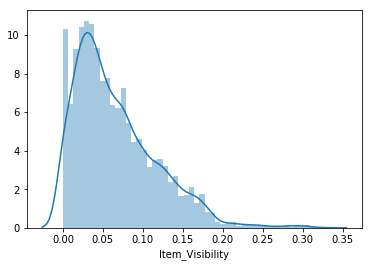

In [119]:
sns.distplot(train['Item_Visibility'].dropna())

/home/royal/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


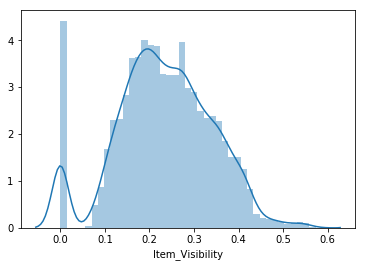

In [120]:
sns.distplot(np.sqrt(train['Item_Visibility'].dropna()))

In [121]:
train['Item_Visibility']=train['Item_Visibility'].apply(lambda x:np.sqrt(x))
test['Item_Visibility']=test['Item_Visibility'].apply(lambda x:np.sqrt(x))

In [122]:
#Examinnig Item mrp

/home/royal/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


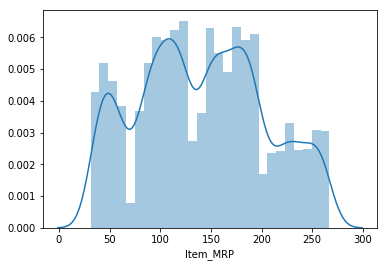

In [123]:
sns.distplot(train['Item_MRP'].dropna())

In [124]:
train['actual_MRP']=train['Item_MRP']
test['actual_MRP']=test['Item_MRP']

In [125]:
train['priceband'] = pd.qcut(train['Item_MRP'],4)
train[['priceband', 'Item_Outlet_Sales']].groupby(['priceband'], as_index=False).mean().sort_values(by='priceband', ascending=True)

,priceband,Item_Outlet_Sales
0,"(31.288999999999998, 93.826]",948.780309
1,"(93.826, 143.013]",1757.214603
2,"(143.013, 185.644]",2576.221513
3,"(185.644, 266.888]",3443.124556


In [126]:
combine=[train,test]
for dataset in combine:
    dataset.loc[ dataset['Item_MRP'] <=93.826, 'Item_MRP'] = 0
    dataset.loc[(dataset['Item_MRP'] >93.826) & (dataset['Item_MRP'] <= 143.013), 'Item_MRP'] = 1
    dataset.loc[(dataset['Item_MRP'] >143.013) & (dataset['Item_MRP'] <= 185.644), 'Item_MRP'] = 2
    dataset.loc[ dataset['Item_MRP'] > 185.644, 'Item_MRP'] = 3
    dataset['Item_MRP'] = dataset['Item_MRP'].astype(int)

train= train.drop(['priceband'], axis=1)
    
train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight,actual_MRP
0,0,1,0.126678,Dairy,3,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,9.300000,249.8092
1,0,0,0.138846,Soft Drinks,0,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,5.920000,48.2692
2,2,1,0.129461,Meat,1,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,17.500000,141.6180
3,2,0,0.000000,Fruits and Vegetables,2,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,19.200000,182.0950
4,0,1,0.000000,Household,0,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,8.930000,53.8614
5,0,0,0.000000,Baking Goods,0,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,10.395000,51.4008
6,1,0,0.112876,Snack Foods,0,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD,13.650000,57.6588
7,1,1,0.357029,Snack Foods,1,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD,12.857645,107.7622
8,2,0,0.129179,Frozen Foods,1,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,FD,16.200000,96.9726
9,2,0,0.307327,Frozen Foods,3,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,FD,19.200000,187.8214


In [127]:
#Examining Outlet_Identifier

In [128]:
train['Outlet_Identifier']=train['Outlet_Identifier'].apply(lambda x:x[-2:])

In [129]:
test['Outlet_Identifier']=test['Outlet_Identifier'].apply(lambda x:x[-2:])

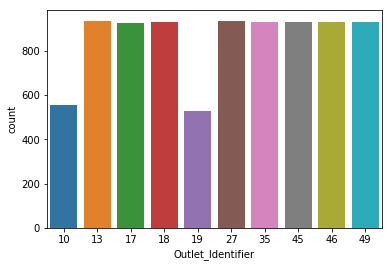

In [130]:
sns.countplot(train['Outlet_Identifier'])

In [131]:
#Examining Outlet_date

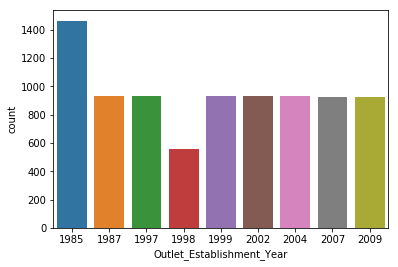

In [132]:
sns.countplot(train['Outlet_Establishment_Year'].dropna())

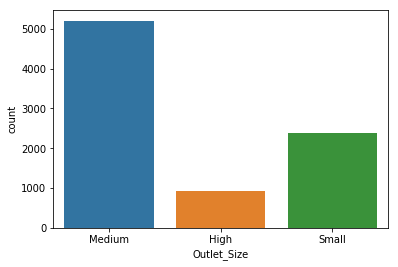

In [133]:
sns.countplot(train['Outlet_Size'].dropna())

In [134]:
train['Outlet_Size'].mode()[0]

'Medium'

In [135]:
train['Outlet_Location_Type']=train['Outlet_Location_Type'].apply(lambda x:x[-1:])
test['Outlet_Location_Type']=test['Outlet_Location_Type'].apply(lambda x:x[-1:])


In [136]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [137]:
train['Outlet_Type']=train['Outlet_Type'].apply(lambda x:x[-1:])
test['Outlet_Type']=test['Outlet_Type'].apply(lambda x:x[-1:])


In [138]:
train.dtypes

Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                       int64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Id                       object
actual_weight                float64
actual_MRP                   float64
dtype: object

In [139]:
train['Outlet_Type']=train['Outlet_Type'].replace('e',3)

In [140]:
test['Outlet_Type']=test['Outlet_Type'].replace('e',3)

In [141]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight,actual_MRP
0,0,1,0.126678,Dairy,3,49,1999,Medium,1,1,3735.1380,FD,9.30,249.8092
1,0,0,0.138846,Soft Drinks,0,18,2009,Medium,3,2,443.4228,DR,5.92,48.2692
2,2,1,0.129461,Meat,1,49,1999,Medium,1,1,2097.2700,FD,17.50,141.6180
3,2,0,0.000000,Fruits and Vegetables,2,10,1998,Medium,3,3,732.3800,FD,19.20,182.0950
4,0,1,0.000000,Household,0,13,1987,High,3,1,994.7052,NC,8.93,53.8614


In [142]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Id,actual_weight,actual_MRP
0,2,1,0.086976,Snack Foods,1,49,1999,Medium,1,1,FD,20.750000,107.8622
1,0,0,0.196030,Dairy,0,17,2007,Medium,2,1,FD,8.300000,87.3198
2,2,1,0.315555,Others,3,10,1998,Medium,3,3,NC,14.600000,241.7538
3,0,1,0.124050,Snack Foods,2,17,2007,Medium,2,1,FD,7.315000,155.0340
4,1,0,0.344383,Dairy,3,27,1985,Medium,3,3,FD,12.695633,234.2300


In [143]:
train.dtypes

Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                       int64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Id                       object
actual_weight                float64
actual_MRP                   float64
dtype: object

In [144]:
####################################################### modelling #####################

In [145]:
train['Item_Type']=train['Item_Type'].astype('category')
train['Outlet_Size']=train['Outlet_Size'].astype('category')
train['Item_Id']=train['Item_Id'].astype('category')


test['Item_Type']=test['Item_Type'].astype('category')
test['Outlet_Size']=test['Outlet_Size'].astype('category')
test['Item_Id']=test['Item_Id'].astype('category')


In [146]:
#label encoding
from sklearn import preprocessing, model_selection, metrics

for f in train.columns :
        if ((f=='Item_Type')or (f=='Outlet_Size') or (f=='Item_Id')):
           
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train[f].values))
            train[f] = lbl.transform(list(train[f].values))
            test[f] = lbl.transform(list(test[f].values))
 

In [147]:
for f in train.columns :
        if (train[f].dtype=='object'):
                train[f]=train[f].astype(np.int)
                test[f]=test[f].astype(np.int)

           

In [148]:
train.dtypes

Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                       int64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Item_Id                        int64
actual_weight                float64
actual_MRP                   float64
dtype: object

In [149]:
# for i in train.columns:
#     train[i]=train[i].astype(np.float64)

In [150]:
# for i in test.columns:
#     test[i]=test[i].astype(np.float64)

In [67]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight,actual_MRP
0,0,1,0.126678,4,3,49,1999,1,1,1,3735.1380,1,9.30,249.8092
1,0,0,0.138846,14,0,18,2009,1,3,2,443.4228,0,5.92,48.2692
2,2,1,0.129461,10,1,49,1999,1,1,1,2097.2700,1,17.50,141.6180
3,2,0,0.000000,6,2,10,1998,1,3,3,732.3800,1,19.20,182.0950
4,0,1,0.000000,9,0,13,1987,0,3,1,994.7052,2,8.93,53.8614


In [151]:
##some more new features
train['num_years'] = train['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test['num_years'] = test['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

# train['actual_MRP']=train['actual_MRP'].astype(object)
# train['fract_mrp'] = train['actual_MRP'].apply(lambda x:str(x)[-4:]) 
# test['fract_mrp'] = test['actual_MRP'].apply(lambda x:str(x)[-4:])
# train['fract_mrp']=train['fract_mrp'].astype(np.float64)
# test['fract_mrp']=test['fract_mrp'].astype(np.float64)

In [152]:
# train['actual_MRP'].apply(lambda x:re

In [153]:
# train= pd.concat([train, pd.get_dummies(train["Item_Weight"], prefix="IW_")], axis=1)
# test = pd.concat([test, pd.get_dummies(test["Item_Weight"], prefix="IW_")], axis=1)

In [154]:
for i in train.columns:
    train[i]=train[i].astype('category')
    
for i in test.columns:
    test[i]=test[i].astype('category')

In [155]:
train['Item_Outlet_Sales']=train['Item_Outlet_Sales'].astype(np.float64)
train['Item_Visibility']=train['Item_Visibility'].astype(np.float64)
train['actual_weight']=train['actual_weight'].astype(np.float64)
train['actual_MRP']=train['actual_MRP'].astype(np.float64)

test['Item_Visibility']=test['Item_Visibility'].astype(np.float64)
test['actual_weight']=test['actual_weight'].astype(np.float64)
test['actual_MRP']=test['actual_MRP'].astype(np.float64)



In [156]:
for i in test.columns:
    if test[i].dtype!=np.float64:
        train= pd.concat([train, pd.get_dummies(train[i], prefix=i[:3])], axis=1)
        test = pd.concat([test, pd.get_dummies(test[i], prefix=i[:3])], axis=1)

In [157]:
train.dtypes

Item_Weight                  category
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                     category
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
Item_Id                      category
actual_weight                 float64
actual_MRP                    float64
num_years                    category
Ite_0                           uint8
Ite_1                           uint8
Ite_2                           uint8
Ite_0                           uint8
Ite_1                           uint8
Ite_0                           uint8
Ite_1                           uint8
Ite_2                           uint8
Ite_3                           uint8
Ite_4                           uint8
Ite_5                           uint8
Ite_6       

In [158]:
train.shape,test.shape

((8523, 80), (5681, 79))

In [159]:
X_train=train.drop(['Item_Outlet_Sales'],axis=1)
y_train=train['Item_Outlet_Sales']

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
dev_X, val_X, dev_y, val_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [162]:
# !pip install lightgbm --user

In [163]:
# !pip install xgboost --user

In [164]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Ite_2,num_4,num_6,num_9,num_11,num_14,num_15,num_16,num_26,num_28
0,0,1,0.126678,4,3,49,1999,1,1,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0.138846,14,0,18,2009,1,3,2,...,0,1,0,0,0,0,0,0,0,0
2,2,1,0.129461,10,1,49,1999,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,2,0,0.000000,6,2,10,1998,1,3,3,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0.000000,9,0,13,1987,0,3,1,...,1,0,0,0,0,0,0,0,1,0


In [165]:
import lightgbm as lgb
import xgboost as xgb

In [166]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 10,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 100, 
                      valid_sets=[lgtrain, lgval], 
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [167]:
pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y,test)
print("LightGBM Training Completed...")

/home/royal/.local/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


LightGBM Training Completed...


In [168]:
pred_test

array([1532.68414126, 1288.01044354,  545.65031873, ..., 1858.34250145,
       3994.10403489, 1281.11339633])

In [169]:
print("Features Importance...")
gain = model.feature_importance('gain')
featureimp = pd.DataFrame({'feature':model.feature_name(), 
                   'split':model.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(featureimp[:50])

Features Importance...
                      feature  split       gain
12                 actual_MRP    216  30.831503
5           Outlet_Identifier     82  21.995945
4                    Item_MRP     46  16.541124
9                 Outlet_Type     34   6.864583
44                     Out_27     30   6.348949
38                      Ite_3      7   3.046460
52                   Out_1998      3   2.262796
37                      Ite_2      8   1.607543
64                      Out_1      5   1.294837
11              actual_weight    133   1.286281
2             Item_Visibility    104   1.061333
49                   Out_1985      6   0.990584
66                      Out_3      2   0.953700
3                   Item_Type     68   0.815691
8        Outlet_Location_Type     14   0.727719
43                     Out_19      7   0.721161
13                  num_years      3   0.484874
35                      Ite_0      5   0.388887
6   Outlet_Establishment_Year     14   0.323045
42               

In [82]:
# def run_xgb(train_X, train_y, val_X, val_y, test_X):
#     params = {'objective': 'reg:linear', 
#           'eval_metric': 'rmse',
#           'eta': 0.03,
#           'max_depth':8,   
#           'subsample': 0.6, 
#           'colsample_bytree': 0.6,
#           'alpha':0.0001,
#           'random_state': 42, 
#           'silent': True}
    
#     tr_data = xgb.DMatrix(train_X, train_y)
#     va_data = xgb.DMatrix(val_X, val_y)
    
#     watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
#     model_xgb = xgb.train(params, tr_data, 200, watchlist, maximize=False, early_stopping_rounds = 100, verbose_eval=100)
    
#     dtest = xgb.DMatrix(test_X)
#     xgb_pred_y = model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit)
    
#     return xgb_pred_y, model_xgb

In [84]:
# pred_test_xgb, model_xgb = run_xgb(dev_X, dev_y, val_X, val_y,test)
# print("XGB Training Completed...")

In [85]:
# pred_test_xgb

In [86]:
# !pip install catboost --user

In [195]:
from catboost import CatBoostRegressor
# categorical_features_indices = [0,1,3,4,5,6,7,8,9,10]

model=CatBoostRegressor(iterations=500, depth=10, learning_rate=0.08, loss_function= 'RMSE')
model.fit(dev_X,dev_y,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2610.1536693	total: 35.5ms	remaining: 17.7s
1:	learn: 2460.8583364	total: 46.6ms	remaining: 11.6s
2:	learn: 2313.1143748	total: 63.4ms	remaining: 10.5s
3:	learn: 2184.0520404	total: 191ms	remaining: 23.7s
4:	learn: 2061.6290293	total: 216ms	remaining: 21.4s
5:	learn: 1948.7617914	total: 245ms	remaining: 20.1s
6:	learn: 1850.8330625	total: 271ms	remaining: 19.1s
7:	learn: 1770.4996833	total: 282ms	remaining: 17.3s
8:	learn: 1687.6264935	total: 323ms	remaining: 17.6s
9:	learn: 1614.6278529	total: 364ms	remaining: 17.8s
10:	learn: 1550.2200313	total: 418ms	remaining: 18.6s
11:	learn: 1494.3055178	total: 519ms	remaining: 21.1s
12:	learn: 1447.3490244	total: 533ms	remaining: 20s
13:	learn: 1402.6488936	total: 568ms	remaining: 19.7s
14:	learn: 1363.2302874	total: 643ms	remaining: 20.8s
15:	learn: 1329.4614574	total: 660ms	remaining: 20s
16:	learn: 1298.3638629	total: 686ms	remaining: 19.5s
17:	learn: 1273.6687768	total: 700ms	remaining: 18.7s
18:	learn: 1249.8696995	total: 710ms	re

155:	learn: 1040.9773018	total: 7.29s	remaining: 16.1s
156:	learn: 1040.9364117	total: 7.3s	remaining: 16s
157:	learn: 1040.9360441	total: 7.31s	remaining: 15.8s
158:	learn: 1040.5996527	total: 7.41s	remaining: 15.9s
159:	learn: 1040.0914594	total: 7.5s	remaining: 15.9s
160:	learn: 1040.0913631	total: 7.52s	remaining: 15.8s
161:	learn: 1039.7697447	total: 7.62s	remaining: 15.9s
162:	learn: 1039.7695195	total: 7.62s	remaining: 15.8s
163:	learn: 1039.2840823	total: 7.65s	remaining: 15.7s
164:	learn: 1038.8485999	total: 7.74s	remaining: 15.7s
165:	learn: 1038.8149061	total: 7.76s	remaining: 15.6s
166:	learn: 1038.1138506	total: 7.84s	remaining: 15.6s
167:	learn: 1037.9710801	total: 7.86s	remaining: 15.5s
168:	learn: 1037.8703373	total: 7.88s	remaining: 15.4s
169:	learn: 1037.5893533	total: 7.91s	remaining: 15.4s
170:	learn: 1037.3598844	total: 7.99s	remaining: 15.4s
171:	learn: 1036.5565825	total: 8.08s	remaining: 15.4s
172:	learn: 1036.5013767	total: 8.09s	remaining: 15.3s
173:	learn: 10

305:	learn: 1007.2659043	total: 14.6s	remaining: 9.28s
306:	learn: 1007.1856818	total: 14.7s	remaining: 9.25s
307:	learn: 1007.1726272	total: 14.7s	remaining: 9.18s
308:	learn: 1007.1720483	total: 14.7s	remaining: 9.11s
309:	learn: 1007.1677504	total: 14.7s	remaining: 9.04s
310:	learn: 1007.1577752	total: 14.8s	remaining: 8.97s
311:	learn: 1007.1577551	total: 14.8s	remaining: 8.9s
312:	learn: 1006.7974787	total: 14.9s	remaining: 8.88s
313:	learn: 1005.5480194	total: 15s	remaining: 8.86s
314:	learn: 1005.2901418	total: 15.1s	remaining: 8.85s
315:	learn: 1005.2780032	total: 15.1s	remaining: 8.79s
316:	learn: 1005.1556405	total: 15.1s	remaining: 8.73s
317:	learn: 1005.1543656	total: 15.1s	remaining: 8.66s
318:	learn: 1005.1323091	total: 15.2s	remaining: 8.61s
319:	learn: 1005.1319514	total: 15.2s	remaining: 8.54s
320:	learn: 1005.1318128	total: 15.2s	remaining: 8.47s
321:	learn: 1005.0234312	total: 15.3s	remaining: 8.44s
322:	learn: 1004.9311451	total: 15.3s	remaining: 8.38s
323:	learn: 1

458:	learn: 978.8157848	total: 21.8s	remaining: 1.95s
459:	learn: 978.7976983	total: 21.8s	remaining: 1.9s
460:	learn: 978.7717549	total: 21.8s	remaining: 1.85s
461:	learn: 978.7714939	total: 21.8s	remaining: 1.8s
462:	learn: 978.2751428	total: 21.9s	remaining: 1.75s
463:	learn: 978.2626109	total: 22s	remaining: 1.7s
464:	learn: 977.8283882	total: 22.1s	remaining: 1.66s
465:	learn: 977.5839958	total: 22.1s	remaining: 1.61s
466:	learn: 977.5308892	total: 22.2s	remaining: 1.57s
467:	learn: 977.2671330	total: 22.3s	remaining: 1.53s
468:	learn: 977.2667449	total: 22.4s	remaining: 1.48s
469:	learn: 976.9145923	total: 22.5s	remaining: 1.43s
470:	learn: 976.8950429	total: 22.5s	remaining: 1.38s
471:	learn: 976.8931387	total: 22.5s	remaining: 1.33s
472:	learn: 976.8887050	total: 22.5s	remaining: 1.28s
473:	learn: 976.1341403	total: 22.6s	remaining: 1.24s
474:	learn: 976.1325271	total: 22.6s	remaining: 1.19s
475:	learn: 975.6684433	total: 22.7s	remaining: 1.14s
476:	learn: 975.5998561	total: 22

In [181]:
# # cb - cv
# from sklearn.model_selection import KFold,cross_val_score
# kf = KFold(n_splits=3)
# cb_model =CatBoostRegressor(n_estimators=1000, max_depth = 8, random_state=7, thread_count=2)
# cb_model.fit(dev_X,dev_y,plot=True)

In [196]:
model.score(val_X,val_y)

1038.0587412412297

In [197]:
yp=model.predict(test)

In [198]:
yp

array([1622.65323329, 1363.7056017 ,  596.98227101, ..., 1846.1041521 ,
       4070.15542572, 1371.89729709])

In [199]:
sub=pd.read_csv('sub.csv')

In [200]:
sub.head()



,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [201]:
sub['Item_Outlet_Sales']=yp

In [202]:
sub.to_csv('result.csv',index=False)